## PREPOCESAMIENTO

#### Librerias y datos

In [ ]:
!sudo apt-get install sox
!pip install opensmile

import opensmile

from pathlib import Path
import tqdm
import glob
from IPython.display import Audio
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import glob
from pathlib import Path
import pandas as pd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopencore-amrnb0 amd64 0.1.3-2.1 [92.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopencore-amrwb0 amd64 0.1.3-2.1 [45.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main a

In [ ]:
!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
!unzip Audio_Speech_Actors_01-24.zip -d hablado



--2021-06-28 18:01:14--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘Audio_Speech_Actors_01-24.zip’

Audio_Speech_Actors 100%[===================>] 198.81M  20.7MB/s    in 12s     

2021-06-28 18:01:28 (16.8 MB/s) - ‘Audio_Speech_Actors_01-24.zip’ saved [208468073/208468073]

Archive:  Audio_Speech_Actors_01-24.zip
   creating: hablado/Actor_01/
  inflating: hablado/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: hablado/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: hablado/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: hablado/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: hablado/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: hablado/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: hablado/Actor_01/03-01-02-01-02-01-01.

In [ ]:
!wget https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip
!unzip Audio_Song_Actors_01-24.zip -d cantado

--2021-06-28 18:01:50--  https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225505317 (215M) [application/octet-stream]
Saving to: ‘Audio_Song_Actors_01-24.zip’

Audio_Song_Actors_0 100%[===================>] 215.06M  25.6MB/s    in 9.4s    

2021-06-28 18:02:01 (23.0 MB/s) - ‘Audio_Song_Actors_01-24.zip’ saved [225505317/225505317]

Archive:  Audio_Song_Actors_01-24.zip
   creating: cantado/Actor_01/
  inflating: cantado/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: cantado/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: cantado/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: cantado/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: cantado/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: cantado/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: cantado/Actor_01/03-02-02-01-02-01-01.wav  
  

#### Metadata

In [ ]:
hablado = []
for file_path in glob.glob('/content/hablado/Actor_*/*.wav'):
  filename = Path(file_path).stem
  filename_parts = filename.split('-')
  metadata = {'file_path': file_path,
              'modality': filename_parts[0],
              'vocal_channel': filename_parts[1],
              'emotion': filename_parts[2],
              'emotional_intensity': filename_parts[3],
              'statement': filename_parts[4],
              'repetition': filename_parts[5],
              'actor': filename_parts[6]}
  hablado.append(metadata)

df_og_hablado = pd.DataFrame(hablado)

In [ ]:
cantado = []
for file_path in glob.glob('/content/cantado/Actor_*/*.wav'):
  filename = Path(file_path).stem
  filename_parts = filename.split('-')
  metadata = {'file_path': file_path,
              'modality': filename_parts[0],
              'vocal_channel': filename_parts[1],
              'emotion': filename_parts[2],
              'emotional_intensity': filename_parts[3],
              'statement': filename_parts[4],
              'repetition': filename_parts[5],
              'actor': filename_parts[6]}
  cantado.append(metadata)

df_og_cantado = pd.DataFrame(cantado)

#### Atributos auditivos

In [ ]:
files = glob.glob('/content/hablado/Actor_*/*.wav')
feats_hablado=pd.DataFrame()
for filename in files:
  smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.eGeMAPSv02,
        feature_level=opensmile.FeatureLevel.Functionals
  )

  feats_an_temp = smile.process_file(filename)
  feats_an_temp = feats_an_temp.reset_index()
  feats_hablado=feats_hablado.append(feats_an_temp)

In [ ]:
files = glob.glob('/content/cantado/Actor_*/*.wav')
feats_cantado=pd.DataFrame()
for filename in files:
  smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.eGeMAPSv02,
        feature_level=opensmile.FeatureLevel.Functionals
  )

  feats_an_temp = smile.process_file(filename)
  feats_an_temp = feats_an_temp.reset_index()
  feats_cantado=feats_cantado.append(feats_an_temp)

#### Uniones

In [ ]:
# Hablado datos con hablados musica
df_hablado = feats_hablado.merge(df_og_hablado, left_on='file', right_on='file_path')
df_hablado = df_hablado.drop(columns=["file", "file_path", "start", "end"])
df_hablado.head(2)

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,...,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,35.224197,0.144831,33.291386,35.722137,39.058437,5.767052,53.731640,50.085823,132.338943,127.774986,0.267414,1.322637,0.007604,0.043390,0.529767,0.522163,5.526840,2.644254,7.751931,5.063908,0.149709,1.778002,10.131166,1.698071,5.444893,2.694093,4.692250,2.369539,0.096793,184.159439,0.048391,1.488113,1.407889,0.633062,4.481595,0.998636,9.324936,1.268530,20.427942,0.369139,...,0.388315,-135.972458,-0.622644,-11.464105,-0.834570,19.326763,0.476740,0.107129,0.372712,-0.016485,-1.079258,0.373383,0.902641,24.258457,0.596199,-2.549993,-7.328613,4.341712,3.337707,-15.160955,-1.354672,-8.714993,19.604002,-0.001033,0.009768,0.025722,2.185792,1.385042,0.252000,0.184109,0.4460,0.433894,-38.000282,03,01,08,02,02,01,05
1,23.308792,0.038687,23.059052,23.408348,23.940384,0.881332,17.408148,12.655101,74.417267,42.560619,0.049950,1.189221,0.006443,0.021003,0.096617,0.090174,0.824187,0.451400,0.680627,0.557108,0.009898,1.483425,10.058058,1.782452,12.069528,0.759891,12.186122,1.088066,3.124758,4.518745,0.018036,1.471825,0.915199,0.743925,4.759032,0.688926,3.946708,0.731734,27.377459,0.176081,...,0.440840,-181.529327,-0.293672,-13.917295,-0.469401,21.578417,0.345239,0.049037,0.370798,-0.026081,-0.370554,0.035821,0.623887,29.199158,0.490208,12.216211,0.625018,18.447239,0.884056,-18.304111,-1.007671,-10.769746,19.805103,0.005018,0.002616,0.006830,1.631702,0.707547,0.146667,0.094281,0.9325,0.726202,-58.460819,03,01,02,02,02,02,05


In [ ]:
# Cantado datos con cantado musica
df_cantado = feats_cantado.merge(df_og_cantado, left_on='file', right_on='file_path')
df_cantado = df_cantado.drop(columns=["file", "file_path", "start", "end"])
df_cantado.head(2)

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,...,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,33.012676,0.051958,31.560438,32.487656,34.951508,3.391069,124.491974,195.322449,19.690189,9.054596,0.176105,0.924417,0.010089,0.143493,0.336843,0.326754,3.443392,3.227376,2.440749,1.313265,0.050881,1.072199,19.592949,0.889809,8.918248,0.916418,9.420612,1.448895,2.189779,7.809625,0.009307,0.813018,0.956620,0.997128,8.894414,0.333733,1.978137,4.259993,20.670296,0.389068,...,0.477821,-116.985649,-0.718584,-16.278658,-0.498409,24.144772,0.365993,0.064821,0.578776,-0.024860,-0.661494,0.088921,0.542817,31.789467,0.437036,9.602182,0.811210,11.674686,1.448562,-7.866796,-2.359293,-12.226010,23.923166,-0.003273,0.007266,0.016896,3.433476,1.301518,0.358333,0.296728,0.287500,0.387452,-44.868309,03,02,06,02,01,01,05
1,32.119591,0.062104,31.483849,32.113995,33.735054,2.251205,857.165527,842.872314,16.898363,12.301411,0.180077,0.971845,0.008934,0.146785,0.357613,0.348679,2.302463,1.746634,2.543395,1.391147,0.043150,1.074666,18.362238,1.064534,7.735507,1.487479,14.118565,0.717726,-2.115214,-8.909134,0.008685,0.937458,0.732171,0.895585,8.669004,0.445150,1.818575,4.507820,21.946955,0.259713,...,0.546415,-114.444481,-0.757325,-13.976736,-0.542836,21.767479,0.353561,0.098272,0.372873,-0.022755,-0.586144,0.079081,0.513100,32.358650,0.470007,1.961795,5.714872,17.871143,0.672336,-15.729236,-1.186602,-12.660863,23.212553,-0.010775,0.006438,0.010455,1.931331,1.518438,0.311429,0.166941,0.327143,0.407736,-45.050816,03,02,01,01,02,01,05


In [ ]:
#df_hablado.to_csv('hablado.csv',index=False)
#df_cantado.to_csv('cantado.csv',index=False)

In [ ]:
#df_hablado = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSqzVUmAl7hBaLn6B8cSCq4fCuB4q642NCWpxiC8cA6umkqeq1fxJer4b4F1DDEiYXwnoQYLQKfNm_F/pub?gid=1696927492&single=true&output=csv')
#df_cantado = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRMKVZlHgl_XA3v-AJQ6g53IOHsd4gtqBdI3PoIOQtCZGAkFIJ9k9Q2TrfVHCe9KKJloiIXGcAwlL9W/pub?gid=1926619561&single=true&output=csv')

In [ ]:
df_general = pd.concat([df_hablado, df_cantado])
df_general.head(2)

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,...,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,35.224197,0.144831,33.291386,35.722137,39.058437,5.767052,53.731640,50.085823,132.338943,127.774986,0.267414,1.322637,0.007604,0.043390,0.529767,0.522163,5.526840,2.644254,7.751931,5.063908,0.149709,1.778002,10.131166,1.698071,5.444893,2.694093,4.692250,2.369539,0.096793,184.159439,0.048391,1.488113,1.407889,0.633062,4.481595,0.998636,9.324936,1.268530,20.427942,0.369139,...,0.388315,-135.972458,-0.622644,-11.464105,-0.834570,19.326763,0.476740,0.107129,0.372712,-0.016485,-1.079258,0.373383,0.902641,24.258457,0.596199,-2.549993,-7.328613,4.341712,3.337707,-15.160955,-1.354672,-8.714993,19.604002,-0.001033,0.009768,0.025722,2.185792,1.385042,0.252000,0.184109,0.4460,0.433894,-38.000282,03,01,08,02,02,01,05
1,23.308792,0.038687,23.059052,23.408348,23.940384,0.881332,17.408148,12.655101,74.417267,42.560619,0.049950,1.189221,0.006443,0.021003,0.096617,0.090174,0.824187,0.451400,0.680627,0.557108,0.009898,1.483425,10.058058,1.782452,12.069528,0.759891,12.186122,1.088066,3.124758,4.518745,0.018036,1.471825,0.915199,0.743925,4.759032,0.688926,3.946708,0.731734,27.377459,0.176081,...,0.440840,-181.529327,-0.293672,-13.917295,-0.469401,21.578417,0.345239,0.049037,0.370798,-0.026081,-0.370554,0.035821,0.623887,29.199158,0.490208,12.216211,0.625018,18.447239,0.884056,-18.304111,-1.007671,-10.769746,19.805103,0.005018,0.002616,0.006830,1.631702,0.707547,0.146667,0.094281,0.9325,0.726202,-58.460819,03,01,02,02,02,02,05


In [ ]:
df_general.shape

(2452, 95)

## RANDOM FOREST

### 12 FOLDS CV

In [ ]:
#Split hablado y cantado
from sklearn.model_selection import train_test_split
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(df_hablado.loc[:, df_hablado.columns != 'emotion'], df_hablado['emotion'], stratify=df_hablado['emotion'], random_state=127)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(df_cantado.loc[:, df_cantado.columns != 'emotion'], df_cantado['emotion'], stratify=df_cantado['emotion'], random_state=127)

In [ ]:
#Split general
X_train, X_test, y_train, y_test = train_test_split(df_general.loc[:, df_general.columns != 'emotion'], df_general['emotion'], stratify=df_general['emotion'], random_state=127)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit

#### Hablado

In [ ]:
#modelo hablado
parameters = {'n_estimators':range(50, 500, 10), 'max_depth':range(1,8), 'bootstrap':[True, False]}
clf_habla = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=10,
                         scoring='accuracy',cv=12, n_iter=50,random_state = 127)

clf_habla.fit(X_h_train, y_h_train)
rf_habla = clf_habla.best_estimator_
print (clf_habla.best_score_, clf_habla.best_params_)
print("Accuracy training habla: {:.3f}".format(rf_habla.score(X_h_train, y_h_train)))
print("Accuracy test habla: {:.3f}".format(rf_habla.score(X_h_test, y_h_test)))

0.574074074074074 {'n_estimators': 160, 'max_depth': 7, 'bootstrap': False}
Accuracy training habla: 0.954
Accuracy test habla: 0.589


In [ ]:
from sklearn.externals import joblib
joblib.dump(rf_habla, 'rf_habla_folds.pkl') # Guarda el modelo.
rf_habla_folds = joblib.load('rf_habla_folds.pkl') # Carga del modelo.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rf_habla_folds

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_h_test.value_counts()

02    48
05    48
03    48
04    48
08    48
06    48
07    48
01    24
Name: emotion, dtype: int64

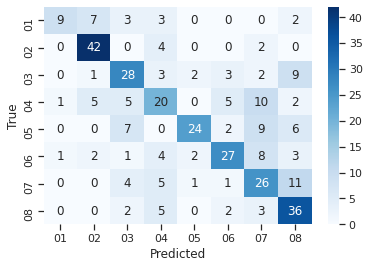

In [ ]:
labels = ['01', '02','03','04','05','06','07','08']
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_grid = confusion_matrix(y_h_test,rf_habla.predict(X_h_test))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap='Blues',annot=True,ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Cantado

In [ ]:
#modelo cantado
parameters = {'n_estimators':range(50, 500, 10), 'max_depth':range(1,8), 'bootstrap':[True, False]}
clf_canta = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=10,
                         scoring='accuracy',cv=12, n_iter=50,random_state = 127)

clf_canta.fit(X_c_train, y_c_train)
rf_canta = clf_canta.best_estimator_
print (clf_canta.best_score_, clf_canta.best_params_)
print("Accuracy training canta: {:.3f}".format(rf_canta.score(X_c_train, y_c_train)))
print("Accuracy test canta: {:.3f}".format(rf_canta.score(X_c_test, y_c_test)))

0.7641162367724869 {'n_estimators': 160, 'max_depth': 7, 'bootstrap': False}
Accuracy training canta: 0.996
Accuracy test canta: 0.747


In [ ]:
joblib.dump(rf_canta, 'rf_canta_folds.pkl') # Guarda el modelo.
rf_canta_folds = joblib.load('rf_canta_folds.pkl') # Carga del modelo.

In [ ]:
rf_canta_folds

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

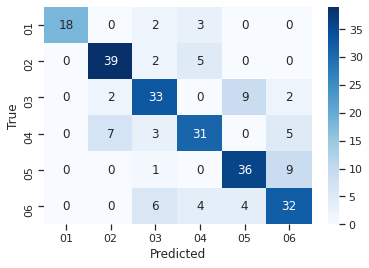

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_grid = confusion_matrix(y_c_test,rf_canta.predict(X_c_test))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap='Blues',annot=True,ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### General

In [ ]:
#modelo general
parameters = {'n_estimators':range(50, 500, 10), 'max_depth':range(1,8), 'bootstrap':[True, False]}
clf_general = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=10,
                         scoring='accuracy',cv=12, n_iter=50,random_state = 127)

clf_general.fit(X_train, y_train)
rf_general = clf_general.best_estimator_

In [ ]:
print("Accuracy training hablado: {:.3f}".format(rf_general.score(X_train[X_train['vocal_channel']=='01'], y_train[X_train['vocal_channel']=='01'])))
print("Accuracy test hablado: {:.3f}".format(rf_general.score(X_test[X_test['vocal_channel']=='01'], y_test[X_test['vocal_channel']=='01'])))

Accuracy training hablado: 0.879
Accuracy test hablado: 0.538


In [ ]:
print("Accuracy training cantado: {:.3f}".format(rf_general.score(X_train[X_train['vocal_channel']=='02'], y_train[X_train['vocal_channel']=='02'])))
print("Accuracy test cantado: {:.3f}".format(rf_general.score(X_test[X_test['vocal_channel']=='02'], y_test[X_test['vocal_channel']=='02'])))

Accuracy training cantado: 0.942
Accuracy test cantado: 0.744


In [ ]:
joblib.dump(rf_general, 'rf_general_folds.pkl') # Guardo el modelo.
rf_general_folds = joblib.load('rf_general_folds.pkl') # Carga del modelo.

In [ ]:
rf_general_folds

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

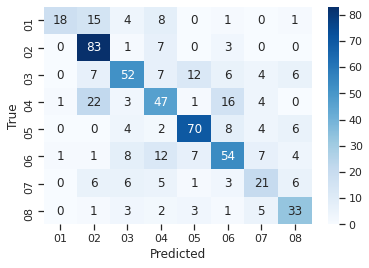

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_grid = confusion_matrix(y_test,rf_general.predict(X_test))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap='Blues',annot=True,ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### LPGO

In [ ]:
## LEAVE ONE GROUP OUT
from sklearn.model_selection import LeavePGroupsOut

In [ ]:
#HABLADO
X_groups_h = np.array(df_hablado.loc[:, df_hablado.columns != 'emotion'])
y_groups_h = np.array(df_hablado['emotion'])
groups_h = np.array(df_hablado['actor'])
lpgo_h = LeavePGroupsOut(n_groups=2)
lpgo_h.get_n_splits(X_groups_h, y_groups_h, groups_h)

276

In [ ]:
for train_index_h, test_index_h in lpgo_h.split(X_groups_h, y_groups_h, groups_h):
  X_train_h, X_test_h = X_groups_h[train_index_h], X_groups_h[test_index_h]
  y_train_h, y_test_h = y_groups_h[train_index_h], y_groups_h[test_index_h]
  

In [ ]:
X_train_h, X_test_h = X_groups_h[train_index_h, :], X_groups_h[test_index_h, :]
y_train_h, y_test_h = y_groups_h[train_index_h], y_groups_h[test_index_h]

### Hablado

In [ ]:
from sklearn.model_selection import LeavePGroupsOut
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_groups_h = np.array(df_hablado.loc[:, df_hablado.columns != 'emotion'])
y_groups_h = np.array(df_hablado['emotion'])
groups_h = np.array(df_hablado['actor'])
lpgo_h = LeavePGroupsOut(n_groups=2)
y_test_true=[]
y_test_pred=[]
y_train_true=[]
y_train_pred=[]

for train_index_h, test_index_h in lpgo_h.split(X_groups_h, y_groups_h, groups_h):
  #print("TRAIN:", train_index_h, "TEST:", test_index_h)
  X_train_h, X_test_h = X_groups_h[train_index_h], X_groups_h[test_index_h]
  y_train_h, y_test_h = y_groups_h[train_index_h], y_groups_h[test_index_h]
  model = RandomForestClassifier(random_state=127)
  model.fit(X_train_h, y_train_h)
  yhat = model.predict(X_test_h)
  y_test_true.append(y_test_h[0])
  y_test_pred.append(yhat[0])
  yhat2 = model.predict(X_train_h)
  y_train_true.append(y_train_h[0])
  y_train_pred.append(yhat2[0])
# calculate accuracy
acc = accuracy_score(y_test_true, y_test_pred)
acc2 = accuracy_score(y_train_true, y_train_pred)
print('Accuracy training: %.3f' % acc2)
print('Accuracy testing: %.3f' % acc)

Accuracy training: 1.000
Accuracy testing: 0.518


### Cantado

In [ ]:
from sklearn.model_selection import LeavePGroupsOut
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_groups_c = np.array(df_cantado.loc[:, df_cantado.columns != 'emotion'])
y_groups_c = np.array(df_cantado['emotion'])
groups_c = np.array(df_cantado['actor'])
lpgo_c = LeavePGroupsOut(n_groups=2)
y_test_true=[]
y_test_pred=[]
y_train_true=[]
y_train_pred=[]

for train_index_c, test_index_c in lpgo_c.split(X_groups_c, y_groups_c, groups_c):
  #print("TRAIN:", train_index_c, "TEST:", test_index_c)
  X_train_c, X_test_c = X_groups_c[train_index_c], X_groups_c[test_index_c]
  y_train_c, y_test_c = y_groups_c[train_index_c], y_groups_c[test_index_c]
  model = RandomForestClassifier(random_state=127)
  model.fit(X_train_c, y_train_c)
  yhat = model.predict(X_test_c)
  y_test_true.append(y_test_c[0])
  y_test_pred.append(yhat[0])
  yhat2 = model.predict(X_train_c)
  y_train_true.append(y_train_c[0])
  y_train_pred.append(yhat2[0])
# calculate accuracy
acc = accuracy_score(y_test_true, y_test_pred)
acc2 = accuracy_score(y_train_true, y_train_pred)
print('Accuracy training: %.3f' % acc2)
print('Accuracy testing: %.3f' % acc)

Accuracy training: 1.000
Accuracy testing: 0.589


## ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

####AB Hablado

In [ ]:
parameters = {'n_estimators':range(50, 200, 5),'learning_rate':np.arange(0,1,0.01)}
clf = RandomizedSearchCV(AdaBoostClassifier(), parameters, n_jobs=-1, scoring='accuracy',cv=12, n_iter=50)

clf.fit(X_h_train, y_h_train)
ab_habla = clf.best_estimator_
print (clf.best_score_, clf.best_params_)
print("Accuracy training : {:.3f}".format(ab_habla.score(X_h_train, y_h_train)))
print("Accuracy test: {:.3f}".format(ab_habla.score(X_h_test, y_h_test)))

Accuracy training : 0.504
Accuracy test: 0.500


In [ ]:
joblib.dump(ab_habla, 'ab_habla.pkl') # Guardo el modelo.
ab_habla = joblib.load('ab_habla.pkl') # Carga del modelo.

In [ ]:
ab_habla

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.26,
                   n_estimators=100, random_state=None)

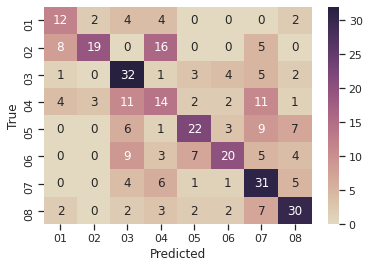

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_grid = confusion_matrix(y_h_test,ab_habla.predict(X_h_test))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True,ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

####AB Cantado

In [ ]:
parameters = {'n_estimators':range(50, 200, 5),'learning_rate':np.arange(0,1,0.01)}
clf = RandomizedSearchCV(AdaBoostClassifier(), parameters, n_jobs=-1, scoring='accuracy',cv=12, n_iter=50)

clf.fit(X_c_train, y_c_train)
ab_canta = clf.best_estimator_
print (clf.best_score_, clf.best_params_)
print("Accuracy training : {:.3f}".format(ab_canta.score(X_c_train, y_c_train)))
print("Accuracy test: {:.3f}".format(ab_canta.score(X_c_test, y_c_test)))

0.5295965608465608 {'n_estimators': 170, 'learning_rate': 0.66}
Accuracy training : 0.567
Accuracy test: 0.490


In [ ]:
joblib.dump(ab_canta, 'ab_canta.pkl') # Guardo el modelo.
ab_canta = joblib.load('ab_canta.pkl') # Carga del modelo.

In [ ]:
ab_canta

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.66,
                   n_estimators=170, random_state=None)

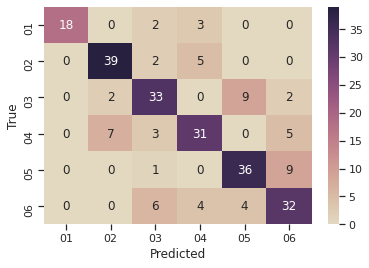

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_grid = confusion_matrix(y_c_test,rf_canta.predict(X_c_test))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True,ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

####AB General

In [ ]:
parameters = {'n_estimators':range(50, 200, 5),'learning_rate':np.arange(0,1,0.01)}
clf = RandomizedSearchCV(AdaBoostClassifier(), parameters, n_jobs=-1, scoring='accuracy',cv=12, n_iter=50)

clf.fit(X_train, y_train) 
ab_general = clf.best_estimator_

In [ ]:
print (clf.best_score_, clf.best_params_)
print("Accuracy training hablado: {:.3f}".format(ab_general.score(X_train[X_train['vocal_channel']=='01'], y_train[X_train['vocal_channel']=='01'])))
print("Accuracy test hablado: {:.3f}".format(ab_general.score(X_test[X_test['vocal_channel']=='01'], y_test[X_test['vocal_channel']=='01'])))

Accuracy training hablado: 0.462
Accuracy test hablado: 0.388


In [ ]:
print (clf.best_score_, clf.best_params_)
print("Accuracy training cantado: {:.3f}".format(ab_general.score(X_train[X_train['vocal_channel']=='02'], y_train[X_train['vocal_channel']=='02'])))
print("Accuracy test cantado: {:.3f}".format(ab_general.score(X_test[X_test['vocal_channel']=='02'], y_test[X_test['vocal_channel']=='02'])))

0.4415372209489856 {'n_estimators': 115, 'learning_rate': 0.3}
Accuracy training : 0.491
Accuracy test: 0.483


In [ ]:
joblib.dump(ab_general, 'ab_general.pkl') # Guardo el modelo.
ab_general = joblib.load('ab_general.pkl') # Carga del modelo.
ab_general

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.35000000000000003, n_estimators=125,
                   random_state=None)

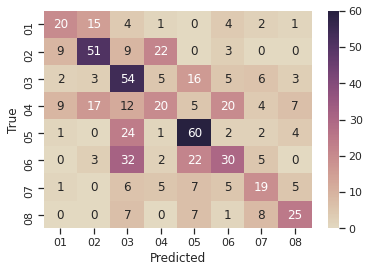

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_grid = confusion_matrix(y_test,ab_general.predict(X_test))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True,ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## NUEVOS AUDIOS

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1U9U043Y_Xf-dDOS1nWGvqhojjk8wwJq_' -O 'audios_propios.zip'

--2021-06-28 18:54:52--  https://docs.google.com/uc?export=download&id=1U9U043Y_Xf-dDOS1nWGvqhojjk8wwJq_
Resolving docs.google.com (docs.google.com)... 173.194.210.139, 173.194.210.100, 173.194.210.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1bu7i2bvmg3p3pefc9e20mrlq0m5u6ll/1624906425000/03182140012590803755/*/1U9U043Y_Xf-dDOS1nWGvqhojjk8wwJq_?e=download [following]
--2021-06-28 18:54:53--  https://doc-0s-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1bu7i2bvmg3p3pefc9e20mrlq0m5u6ll/1624906425000/03182140012590803755/*/1U9U043Y_Xf-dDOS1nWGvqhojjk8wwJq_?e=download
Resolving doc-0s-04-docs.googleusercontent.com (doc-0s-04-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0s-04-docs.googleusercontent.com (doc-0s

In [ ]:
!unzip audios_propios.zip -d audios

Archive:  audios_propios.zip
  inflating: audios/audios_propios/03-01-05-01-02-01-333-01.wav  
  inflating: audios/audios_propios/03-01-05-01-02-01-333-02.wav  
  inflating: audios/audios_propios/03-01-05-01-01-01-111-02.wav  
  inflating: audios/audios_propios/03-01-05-01-01-01-333-02.wav  
  inflating: audios/audios_propios/03-01-05-01-02-01-111-01.wav  
  inflating: audios/audios_propios/03-01-03-01-02-01-111-02.wav  
  inflating: audios/audios_propios/03-01-03-01-01-01-333-01.wav  
  inflating: audios/audios_propios/03-01-03-01-02-01-222-02.wav  
  inflating: audios/audios_propios/03-01-01-01-01-01-111-01.wav  
  inflating: audios/audios_propios/03-01-03-01-01-01-222-02.wav  
  inflating: audios/audios_propios/03-01-01-01-02-01-222-01.wav  
  inflating: audios/audios_propios/03-01-04-01-01-01-222-01.wav  


In [ ]:
audios = []
for file_path in glob.glob('/content/audios/audios_propios/*.wav'):
  filename = Path(file_path).stem
  filename_parts = filename.split('-')
  metadata = {'file_path': file_path,
              'modality': filename_parts[0],
              'vocal_channel': filename_parts[1],
              'emotion': filename_parts[2],
              'emotional_intensity': filename_parts[3],
              'statement': filename_parts[4],
              'repetition': filename_parts[5],
              'actor': filename_parts[6]}
  audios.append(metadata)

meta_audios = pd.DataFrame(audios)

In [ ]:
meta_audios.head(2)

,file_path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,/content/audios/audios_propios/03-01-01-01-01-...,03,01,01,01,01,01,111
1,/content/audios/audios_propios/03-01-03-01-02-...,03,01,03,01,02,01,222


In [ ]:
feats_audios=pd.DataFrame()

for filename in glob.glob('/content/audios/audios_propios/*.wav'):
  smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.eGeMAPSv02,
        feature_level=opensmile.FeatureLevel.Functionals
  )

  feats_an_temp = smile.process_file(filename)
  feats_an_temp = feats_an_temp.reset_index()
  feats_audios=feats_audios.append(feats_an_temp)

In [ ]:
feats_audios.head(2)

,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,...,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,/content/audios/audios_propios/03-01-01-01-01-...,0 days,0 days 00:00:02.617833333,20.057011,0.119131,18.218878,19.855009,22.290768,4.071890,184.265549,152.891785,-2.94635,47.935410,0.353331,0.970557,0.035758,0.240393,0.679838,0.644080,8.033161,2.904441,8.344942,4.883986,0.270749,1.026786,27.088837,0.545855,18.145493,0.589837,16.123838,0.916928,4.078634,3.028184,0.056357,1.027917,1.866421,0.797722,0.865732,4.543822,4.314741,...,891.406006,0.368678,-108.314667,-0.761591,2611.987549,0.121742,912.419678,0.479757,-111.218750,-0.715175,-23.853029,-0.352452,33.726597,0.296025,-0.015828,-2.035532,-0.019767,-0.518898,0.403899,0.685496,34.986614,0.273208,19.875029,0.549837,20.024412,0.636123,5.677342,2.371363,-14.006259,23.573963,0.017083,-0.007802,0.132451,3.846154,1.984127,0.260,0.171231,0.154286,0.083471,-32.796173
0,/content/audios/audios_propios/03-01-03-01-02-...,0 days,0 days 00:00:02.557833333,36.392101,0.183987,31.012262,32.108810,42.085060,11.072798,106.878021,66.311096,300.46640,288.335968,0.969139,0.314115,0.721506,0.937210,1.184283,0.462776,9.571501,3.476023,5.309442,3.658558,0.337951,0.727324,-5.768018,-2.110567,21.976078,0.578983,-9.236095,-1.201844,-3.223419,-2.850304,0.023594,0.787774,1.123502,0.650816,4.821889,0.861010,6.755374,...,705.120361,0.539357,-106.578308,-0.777655,3025.937988,0.095596,622.879883,0.633326,-106.881218,-0.771193,-9.619244,-0.802904,14.057124,0.773357,0.079027,0.417580,-0.017427,-0.455218,0.455177,0.606422,3.467259,2.583293,29.097952,0.385610,-6.463708,-2.131543,-4.853031,-2.313278,6.095431,-2.489513,0.083840,-0.001264,0.210608,3.543307,2.409639,0.215,0.213912,0.152857,0.164379,-30.075405


In [ ]:
df_audios = meta_audios.merge(feats_audios, left_on='file_path', right_on='file')
df_audios = df_audios.drop(columns=["file", "file_path", "start", "end"])
df_audios.head(2)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,...,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,03,01,01,01,01,01,111,20.057011,0.119131,18.218878,19.855009,22.290768,4.071890,184.265549,152.891785,-2.94635,47.935410,0.353331,0.970557,0.035758,0.240393,0.679838,0.644080,8.033161,2.904441,8.344942,4.883986,0.270749,1.026786,27.088837,0.545855,18.145493,0.589837,16.123838,0.916928,4.078634,3.028184,0.056357,1.027917,1.866421,...,891.406006,0.368678,-108.314667,-0.761591,2611.987549,0.121742,912.419678,0.479757,-111.218750,-0.715175,-23.853029,-0.352452,33.726597,0.296025,-0.015828,-2.035532,-0.019767,-0.518898,0.403899,0.685496,34.986614,0.273208,19.875029,0.549837,20.024412,0.636123,5.677342,2.371363,-14.006259,23.573963,0.017083,-0.007802,0.132451,3.846154,1.984127,0.260,0.171231,0.154286,0.083471,-32.796173
1,03,01,03,01,02,01,222,36.392101,0.183987,31.012262,32.108810,42.085060,11.072798,106.878021,66.311096,300.46640,288.335968,0.969139,0.314115,0.721506,0.937210,1.184283,0.462776,9.571501,3.476023,5.309442,3.658558,0.337951,0.727324,-5.768018,-2.110567,21.976078,0.578983,-9.236095,-1.201844,-3.223419,-2.850304,0.023594,0.787774,1.123502,...,705.120361,0.539357,-106.578308,-0.777655,3025.937988,0.095596,622.879883,0.633326,-106.881218,-0.771193,-9.619244,-0.802904,14.057124,0.773357,0.079027,0.417580,-0.017427,-0.455218,0.455177,0.606422,3.467259,2.583293,29.097952,0.385610,-6.463708,-2.131543,-4.853031,-2.313278,6.095431,-2.489513,0.083840,-0.001264,0.210608,3.543307,2.409639,0.215,0.213912,0.152857,0.164379,-30.075405


## Modelo RF general


In [ ]:
X_audios = df_audios.loc[:, df_audios.columns != 'emotion']
y_audios = df_audios['emotion']

In [ ]:
rf_general_folds.predict(X_audios)

array(['03', '03', '05', '05', '03', '05', '03', '03', '03', '03', '06',
       '05'], dtype=object)

In [ ]:
y_audios

0     03
1     03
2     04
3     05
4     05
5     05
6     05
7     05
8     01
9     01
10    03
11    03
Name: emotion, dtype: object

In [ ]:
print("Accuracy con audios nuevos del modelo general: {:.3f}".format(rf_general_folds.score(X_audios, y_audios)))

Accuracy con audios nuevos del modelo general: 0.417


In [ ]:
rf_canta_folds = joblib.load('rf_canta_folds.pkl') 
rf_habla_folds = joblib.load('rf_habla_folds.pkl')

In [ ]:
pred_canta = rf_canta_folds.predict(X_audios)
print("Predicciones del modelo:", pred_canta)
print("Valores reales:", np.array(y_audios))
print("Accuracy con audios nuevos del modelo general: {:.3f}".format(rf_general_folds.score(X_audios, y_audios)))

Predicciones del modelo: ['03' '03' '03' '03' '03' '03' '03' '03' '03' '03' '05' '03']
Valores reales: ['01' '03' '03' '05' '05' '05' '04' '01' '03' '05' '03' '05']
Accuracy con audios nuevos del modelo general: 0.417


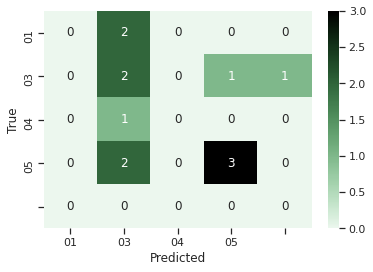

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set(style="ticks", color_codes=True)
labels2=["01","03","04","05"]  #como no tenemos ninguno con 2 si no queda mal la matriz
cm_grid = confusion_matrix(y_audios,rf_general_folds.predict(X_audios))
ax=plt.subplot()
sns.heatmap(cm_grid, cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, as_cmap=True),annot=True,ax=ax)

ax.set_xticklabels(labels2)
ax.set_yticklabels(labels2)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()